# **Seleção**

## Importação das Bibliotecas

In [ ]:
import gdown
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils.save_dataframe import save_dataframe
from utils.variables import DATA_URL, RAW_DATA_PATH

## Coleta dos Dados

Usamos a função `download` da biblioteca **gdown** para realizar o download dos dados brutos.

In [3]:
gdown.download(url=DATA_URL, output=str(RAW_DATA_PATH), fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1sE-NyGLtPT1EDZ3hKNntGOTCoM-cDfXO
To: /home/marcos-araujo/Desktop/repositories/poscomp-classification/data/raw/poscomp_2016_2022.csv
100%|██████████| 2.41M/2.41M [00:00<00:00, 4.00MB/s]


'../data/raw/poscomp_2016_2022.csv'

## Análise Exploratória dos Dados

Usamos a função `read_csv` da biblioteca **pandas** para carregar os dados brutos baixados em um `DataFrame`.

In [ ]:
df = pd.read_csv(RAW_DATA_PATH)
df.head()

Usamos o método `info` para visualizar informações gerais sobre os dados.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13997 entries, 0 to 13996
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   idade                                           13997 non-null  object 
 1   sexo                                            13997 non-null  object 
 2   estado                                          13997 non-null  object 
 3   presença                                        13997 non-null  object 
 4   cargo                                           13997 non-null  object 
 5   especialidade                                   13997 non-null  object 
 6   algoritmos_e_estruturas_de_dados                11366 non-null  float64
 7   analise_combinatoria                            11366 non-null  float64
 8   analise_de_algoritmos                           11366 non-null  float64
 9   arquitetura_e_organizacao_de_computador

Usamos o método `describe` para visualizar as estatísticas descritivas gerais dos dados.

In [7]:
df.describe()

,algoritmos_e_estruturas_de_dados,analise_combinatoria,analise_de_algoritmos,arquitetura_e_organizacao_de_computadores,banco_de_dados,calculo_diferencial_e_integral,circuitos_digitais,compiladores,computacao_grafica,engenharia_de_software,...,redes_de_computadores,sistemas_distribuidos,sistemas_operacionais,teoria_dos_grafos,tecnicas_de_programacao,algebra_linear,ano,matematica,fund_computacao,tec_computacao
count,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,...,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,11366.000000,13997.000000,13997.000000,13997.000000,13997.000000
mean,1.636196,1.188369,1.700598,0.918529,0.911490,1.102939,1.241950,0.576632,0.505983,1.051029,...,1.182386,1.755411,0.988298,1.479412,2.183178,1.303977,2017.511610,6.520183,11.351647,6.365578
std,0.955438,0.893527,1.026363,0.783607,0.778447,0.835190,0.857083,0.640388,0.606686,0.894053,...,0.830825,0.898160,0.798781,0.979809,0.726267,0.973777,1.389992,4.287449,6.449095,3.863862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2016.000000,4.000000,9.000000,4.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2017.000000,7.000000,13.000000,7.000000
75%,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2018.000000,9.000000,16.000000,9.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2022.000000,20.000000,28.000000,18.000000


Selecionamos as colunas numéricas e calculamos a média de cada uma.

In [8]:
numeric_columns_df = df.select_dtypes(include="number")
mean_scores_series = numeric_columns_df.mean()
mean_scores_series

algoritmos_e_estruturas_de_dados                     1.636196
analise_combinatoria                                 1.188369
analise_de_algoritmos                                1.700598
arquitetura_e_organizacao_de_computadores            0.918529
banco_de_dados                                       0.911490
calculo_diferencial_e_integral                       1.102939
circuitos_digitais                                   1.241950
compiladores                                         0.576632
computacao_grafica                                   0.505983
engenharia_de_software                               1.051029
geometria_analitica                                  1.023755
inteligencia_artificial                              1.124054
linguagens_de_programacao                            2.045926
linguagens_formais_automatos_e_computabilidade       1.017508
logica_matematica                                    1.326236
matematica_discreta                                  1.241510
organiza

Selecionamos apenas os assuntos e transformamos em um `DataFrame` com a média de acertos por assunto.

In [9]:
avg_score_per_subject_df = mean_scores_series.drop(
    ["ano", "matematica", "fund_computacao", "tec_computacao"],
).reset_index()
avg_score_per_subject_df.columns = ["assunto", "media_de_acertos"]
avg_score_per_subject_df

,assunto,media_de_acertos
0,algoritmos_e_estruturas_de_dados,1.636196
1,analise_combinatoria,1.188369
2,analise_de_algoritmos,1.700598
3,arquitetura_e_organizacao_de_computadores,0.918529
4,banco_de_dados,0.911490
5,calculo_diferencial_e_integral,1.102939
6,circuitos_digitais,1.241950
7,compiladores,0.576632
8,computacao_grafica,0.505983
9,engenharia_de_software,1.051029


Selecionamos apenas os campos e transformamos em um `DataFrame` com a média de acertos por campo. 

In [10]:
avg_score_per_field_df = mean_scores_series.loc[
    ["matematica", "fund_computacao", "tec_computacao"]
].reset_index()
avg_score_per_field_df.columns = ["campo", "media_de_acertos"]
avg_score_per_field_df

,campo,media_de_acertos
0,matematica,6.520183
1,fund_computacao,11.351647
2,tec_computacao,6.365578


Selecionamos apenas as colunas de campos e transformamos o `DataFrame` para o formato longo, de modo que cada registro represente um campo e a quantidade de acertos correspondente.

In [11]:
field_scores_long_df = df[["matematica", "fund_computacao", "tec_computacao"]].melt(
    var_name="campo", value_name="acertos",
)
field_scores_long_df

,campo,acertos
0,matematica,14.0
1,matematica,16.0
2,matematica,4.0
3,matematica,4.0
4,matematica,6.0
...,...,...
41986,tec_computacao,7.0
41987,tec_computacao,6.0
41988,tec_computacao,7.0
41989,tec_computacao,10.0


Selecionamos apenas as pessoas que estiveram presentes na prova e salvamos na variável `df_attendees`. 

In [12]:
df_attendees = df[df["presença"] == "s"].reset_index(drop=True)
df_attendees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11367 entries, 0 to 11366
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   idade                                           11367 non-null  object 
 1   sexo                                            11367 non-null  object 
 2   estado                                          11367 non-null  object 
 3   presença                                        11367 non-null  object 
 4   cargo                                           11367 non-null  object 
 5   especialidade                                   11367 non-null  object 
 6   algoritmos_e_estruturas_de_dados                11366 non-null  float64
 7   analise_combinatoria                            11366 non-null  float64
 8   analise_de_algoritmos                           11366 non-null  float64
 9   arquitetura_e_organizacao_de_computador

Selecionamos apenas as pessoas que não estiverem presentes durante a prova e armazenamos na variável `df_absentees`.

In [13]:
df_absentees = df[df["presença"] == "n"].reset_index(drop=True)
df_absentees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   idade                                           2630 non-null   object 
 1   sexo                                            2630 non-null   object 
 2   estado                                          2630 non-null   object 
 3   presença                                        2630 non-null   object 
 4   cargo                                           2630 non-null   object 
 5   especialidade                                   2630 non-null   object 
 6   algoritmos_e_estruturas_de_dados                0 non-null      float64
 7   analise_combinatoria                            0 non-null      float64
 8   analise_de_algoritmos                           0 non-null      float64
 9   arquitetura_e_organizacao_de_computadores

Agrupamos os dados por especialidade e calculamos a proporção de faltas em cada uma.

In [14]:
specialty_frequency = df.groupby("especialidade").size().reset_index()
specialty_frequency.columns = ["especialidade", "frequencia"]
absentees_per_specialty = df_absentees.groupby("especialidade").size().reset_index()
absentees_per_specialty.columns = ["especialidade", "faltas"]
absentees_per_specialty["frequencia"] = specialty_frequency["frequencia"]
absentees_per_specialty["proporcao_faltas"] = absentees_per_specialty["faltas"] / absentees_per_specialty["frequencia"] * 100
absentees_per_specialty

,especialidade,faltas,frequencia,proporcao_faltas
0,Demais áreas,96,463,20.734341
1,aplicações computacionais,66,438,15.068493
2,aprendizado de máquina,67,393,17.048346
3,arquitetura de computadores,14,71,19.718310
4,banco de dados,112,570,19.649123
5,bioinformática,17,110,15.454545
6,ciência de dados,26,150,17.333333
7,computação aplicada,114,675,16.888889
8,computação gráfica,21,174,12.068966
9,computação visual,28,109,25.688073


### Visualização dos Dados

Criamos um gráfico de barras horizontais para visualizar a média de acertos por assunto.

Text(0, 0.5, 'Campo')

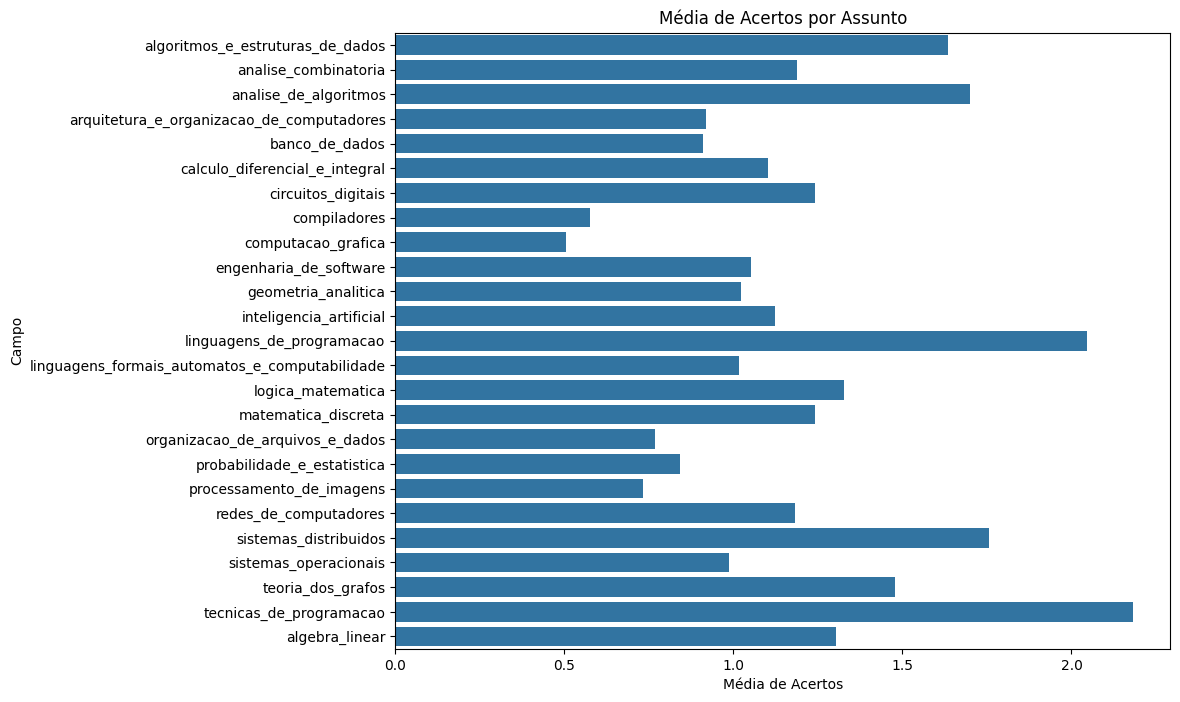

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(
    data=avg_score_per_subject_df, x="media_de_acertos", y="assunto", orient="h",
)
plt.title("Média de Acertos por Assunto")
plt.xlabel("Média de Acertos")
plt.ylabel("Campo")

Criamos um gráfico de barras verticais para visualizar a média de acertos por campo.

Text(0, 0.5, 'Média de Acertos')

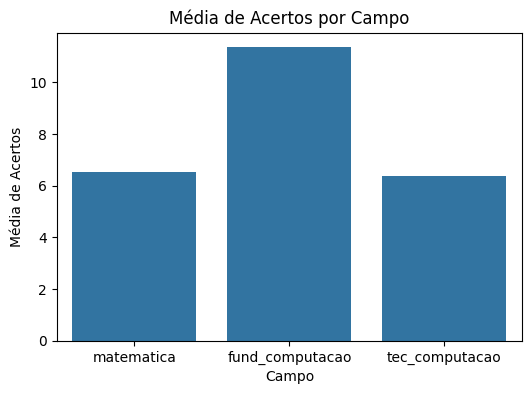

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=avg_score_per_field_df, x="campo", y="media_de_acertos")
plt.title("Média de Acertos por Campo")
plt.xlabel("Campo")
plt.ylabel("Média de Acertos")

Criamos um boxplot para visualizar a distribuição de acertos por campo.

Text(0, 0.5, 'Campo')

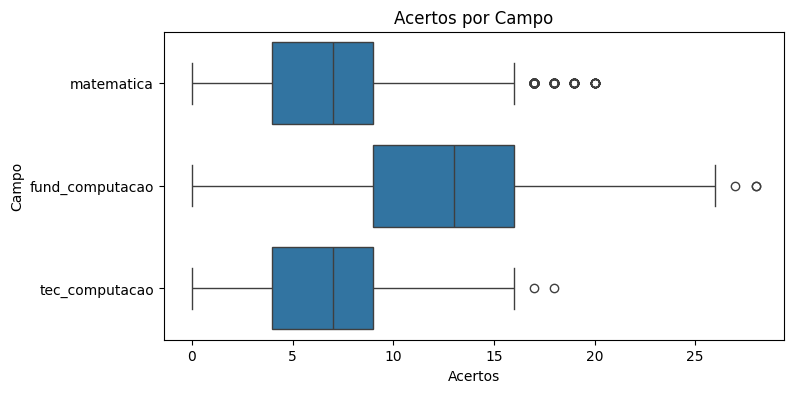

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=field_scores_long_df, x="acertos", y="campo", orient="h")
plt.title("Acertos por Campo")
plt.xlabel("Acertos")
plt.ylabel("Campo")

Criamos um gráficos de barras horizontais para visualizar a proporção de faltas por especialidade.

Text(0, 0.5, 'Especialidade')

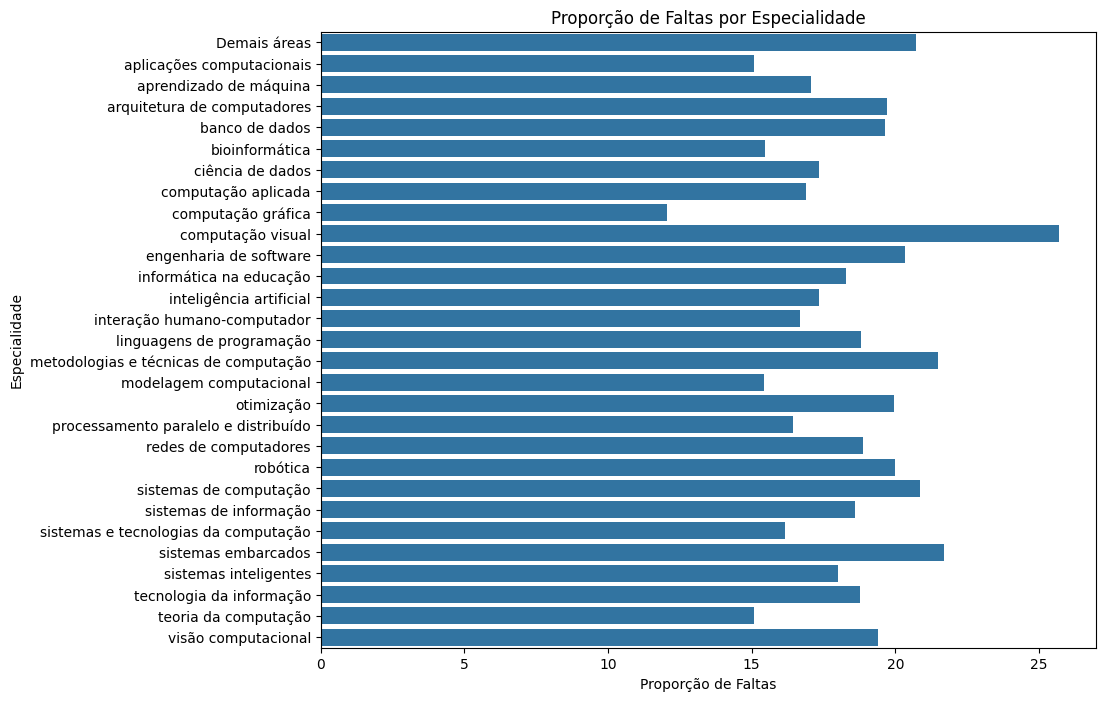

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=absentees_per_specialty, x="proporcao_faltas", y="especialidade", orient="h")
plt.title("Proporção de Faltas por Especialidade")
plt.xlabel("Proporção de Faltas")
plt.ylabel("Especialidade")

## Persistência dos Dados

Usamos a função `save_dataframe` para salvar os dados selecionados.

In [19]:
save_dataframe(df_attendees, "df_selected")